In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

```
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
* Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
* Произвести расчет как с использованием intercept, так и без.

Уравнение имеет вид Y = 444.18 + 2.6205 * x


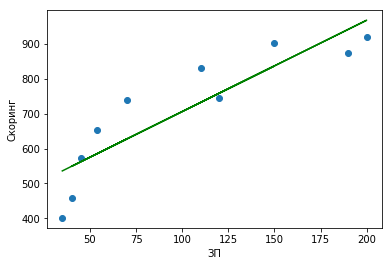

In [120]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(X)

# 1ый способ
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
a = np.mean(y) - b * np.mean(X)

Y = a + b * X # построенная регрессия 
print(f'Уравнение имеет вид Y = {a:0.5} + {b:0.5} * x')


plt.scatter(X, y)
plt.plot(X, Y, color="green")
plt.xlabel('ЗП')
plt.ylabel('Скоринг')
plt.show()

In [69]:
mse = ((y - Y)**2).sum()/n # средне квадратичная ошибка
r = b * np.std(X) / np.std(y) # коэффициент корреляции
R = r**2 # коэффициент детерминации
A = 100 * np.mean(np.abs((y - Y) / y)) # средняя ошибка аппроксимации

print(f'Средне квадратичная ошибка = {mse:0.5}')
print(f'Коэффициент корреляции = {r:0.5}')
print(f'Коэффициент детерминации = {R:0.5}')
print(f'Средняя ошибка аппроксимации = {A:0.5}')

F_fact = (r**2 * (n - 2)) / (1 - r**2) # фактическое значение критерия Фишера
F_tabl = 5.32 # При 5% уровне значимости и степенях свободы 𝑘1 = 1  и  𝑘2 = 10−2=8  табличное значение критерия: 𝐹кр = 5.32

if F_fact > F_tabl:
    print(f'Так как 𝐹факт={F_fact:0.5} > 𝐹табл={F_tabl:0.5}, уравнение регрессии статистически значимо на уровне значимости 0.05')

Средне квадратичная ошибка = 6470.4
Коэффициент корреляции = 0.88749
Коэффициент детерминации = 0.78764
Средняя ошибка аппроксимации = 11.469
Так как 𝐹факт=29.672 > 𝐹табл=5.32, уравнение регрессии статистически значимо на уровне значимости 0.05


**не совсем понял а как считать без intercept - может быть так?**

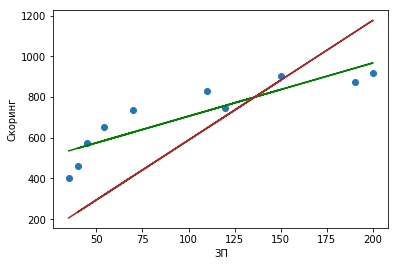

In [71]:
x2 = X.reshape((n, 1))
b2 = np.dot(np.linalg.inv(x2.T @ x2), x2.T @ y1)[0][0]
Y2 = b2 * X

plt.scatter(X, y)
plt.plot(X, Y, color="green")
plt.plot(X, Y2, color="brown")
plt.xlabel('ЗП')
plt.ylabel('Скоринг')
plt.show()

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [117]:
def mse_(B1):
    return np.sum((B1*X - y)**2)/n

alp = 1e-6
B1 = 0.1
k = 1000
for i in range(1000):
    B1 -= alp * (2/n) * np.sum((B1*X - y) * X)
    if i > (k-50):
        print(f'Iteration # {i:<5} B1= {B1:<10.8} mse={mse_(B1):5.10}')

Iteration # 951   B1= 5.8898204  mse=56516.85842
Iteration # 952   B1= 5.8898204  mse=56516.85842
Iteration # 953   B1= 5.8898204  mse=56516.85842
Iteration # 954   B1= 5.8898204  mse=56516.85842
Iteration # 955   B1= 5.8898204  mse=56516.85842
Iteration # 956   B1= 5.8898204  mse=56516.85842
Iteration # 957   B1= 5.8898204  mse=56516.85842
Iteration # 958   B1= 5.8898204  mse=56516.85842
Iteration # 959   B1= 5.8898204  mse=56516.85842
Iteration # 960   B1= 5.8898204  mse=56516.85842
Iteration # 961   B1= 5.8898204  mse=56516.85842
Iteration # 962   B1= 5.8898204  mse=56516.85842
Iteration # 963   B1= 5.8898204  mse=56516.85842
Iteration # 964   B1= 5.8898204  mse=56516.85842
Iteration # 965   B1= 5.8898204  mse=56516.85842
Iteration # 966   B1= 5.8898204  mse=56516.85842
Iteration # 967   B1= 5.8898204  mse=56516.85842
Iteration # 968   B1= 5.8898204  mse=56516.85842
Iteration # 969   B1= 5.8898204  mse=56516.85842
Iteration # 970   B1= 5.8898204  mse=56516.85842
Iteration # 971   B1

#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?


* При **неизвестной** дисперсии (или среднеквадратического отклонения) для вычисления доверительных интервалов и проверки статистических гипотез используется таблица критических точек распределения **Стьюдента**

* Если **известна** дисперсия (или среднеквадратическое отклонение) то для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции **Лапласа**

#### 4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [119]:
def mse_(B0, B1):
    return np.sum((B0 + B1*X - y)**2)/n

alp = 1e-5
B0 = 0.1
B1 = 0.1
k = 1000000
for i in range(k):
    if i < 50:
        print(f'Iteration # {i:<5} B0= {B0:<10.8} B1= {B1:<10.8} mse={mse_(B0, B1):5.10}')
    B0 -= alp * (2/n) * np.sum(B0 + B1*X - y)
    B1 -= alp * (2/n) * np.sum((B0 + B1*X - y) * X)
    if i > (k-50):
        print(f'Iteration # {i:<5} B0= {B0:<10.8} B1= {B1:<10.8} mse={mse_(B0, B1):5.10}')

Iteration # 0     B0= 0.1        B1= 0.1        mse=518196.384
Iteration # 1     B0= 0.1139932  B1= 1.6950496  mse=298808.6692
Iteration # 2     B0= 0.12475136 B1= 2.8505902  mse=183665.2262
Iteration # 3     B0= 0.13316587 B1= 3.6877253  mse=123233.2007
Iteration # 4     B0= 0.1398825  B1= 4.2941893  mse=91515.8469
Iteration # 5     B0= 0.14536908 B1= 4.7335419  mse=74869.07115
Iteration # 6     B0= 0.14996455 B1= 5.0518295  mse=66131.92591
Iteration # 7     B0= 0.15391444 B1= 5.2824107  mse=61546.06808
Iteration # 8     B0= 0.15739664 B1= 5.4494523  mse=59138.97251
Iteration # 9     B0= 0.16054    B1= 5.5704622  mse=57875.38043
Iteration # 10    B0= 0.16343789 B1= 5.6581242  mse=57211.94689
Iteration # 11    B0= 0.16615795 B1= 5.7216269  mse=56863.50252
Iteration # 12    B0= 0.16874916 B1= 5.7676274  mse=56680.37872
Iteration # 13    B0= 0.17124704 B1= 5.8009482  mse=56584.02306
Iteration # 14    B0= 0.17367729 B1= 5.8250831  mse=56533.2078
Iteration # 15    B0= 0.17605855 B1= 5.8425